### **Segunda Parte**. En esta sección la idea es realizar regresión lineal en $\mathbb{R}^2$ y analizar como se comportan las soluciones obtenidas.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### **1.**

**Usando los datos del archivo ejercicio_1.csv:**

In [2]:
data = pd.read_csv('ejercicio_1.csv', sep=',', header=0)

**a) Graficar todos los puntos en el plano xy.**

**Nota: La primer columna del archivo marca el valor de x y la segunda el valor de y de cada punto.**
**Recomendamos usar la biblioteca pandas para leer los archivos con la función read_csv.**

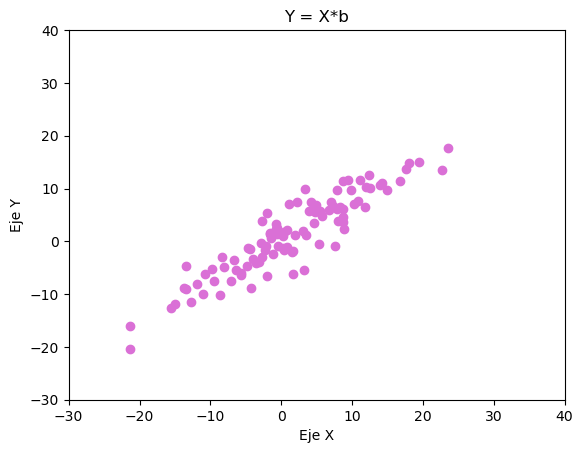

In [3]:
x = data.iloc[:,0]
y = data.iloc[:,1]

fig, ax = plt.subplots()
ax.scatter(x, y, color="orchid")
ax.set_xlabel("Eje X")
ax.set_ylabel("Eje Y")

ax.set_xlim(-30,40)
ax.set_ylim(-30,40)
plt.title("Y = X*b")
plt.show()

**b) Utilizando los conceptos teóricos desarrollados en la primera parte, hallar la recta que mejor aproxima a los datos.**


Para obtener la pendiente de la recta de regresión, usamos la formula obtenida en el ejercicio 1.f: $$\beta^* = (X^T X)^{-1}X^T y$$

Luego graficamos la recta de regresión sobre el scatterplot:

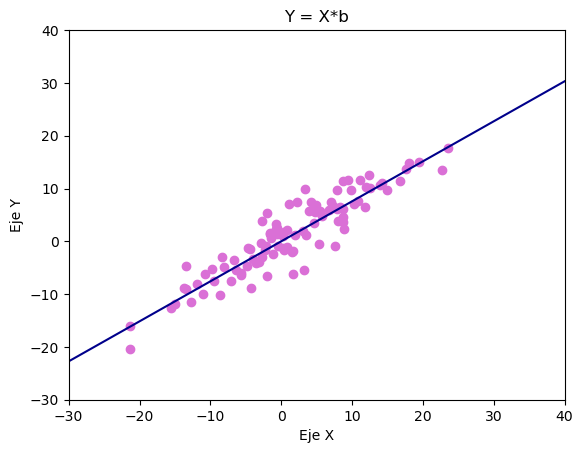

In [4]:
b = np.dot(np.dot(1/np.dot(np.transpose(x), x), np.transpose(x)), y)
x_i = np.linspace(-30, 40, 1000)

#recta de regresión 
y_i = b*x_i

ax.plot(x_i, y_i, color="darkblue")

fig

**c) Realizar nuevamente los incisos (a) y (b) pero considerando los puntos**
$$\{(x_i, y_i + 12) \text{ con } i = 1\ldots n\}$$

**donde $(x_i, y_i)$ eran los puntos originales. ¿Es buena la aproximación realizada?, ¿cuál es el problema?**

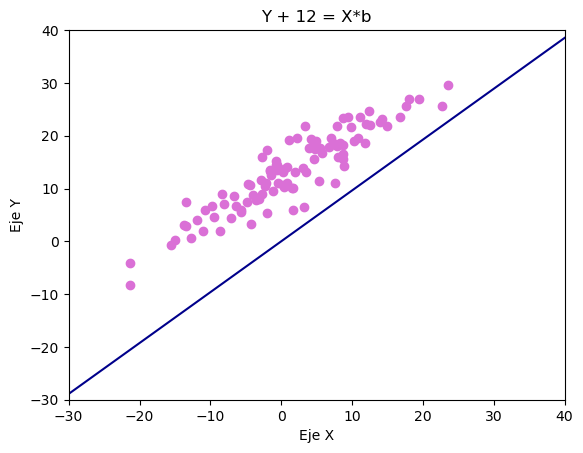

In [5]:
x = data.iloc[:,0]
y_12 = data.iloc[:,1] + 12

fig2, ax2 = plt.subplots()
ax2.scatter(x, y_12, color="orchid")
ax2.set_xlabel("Eje X")
ax2.set_ylabel("Eje Y")

ax2.set_xlim(-30,40)
ax2.set_ylim(-30,40)
plt.title("Y + 12 = X*b")

b = np.dot(np.dot(1/np.dot(np.transpose(x), x), np.transpose(x)), y_12)

x_i = np.linspace(-30, 40, 1000)
#recta de regresión 
y_i = b*x_i

ax2.plot(x_i, y_i, color="darkblue")

plt.show()

No, no es buena la aproximación realizada ya que un modelo lineal de la forma $ y = \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n$ no ajusta datos si se le suma una constante a los datos, porque esta suma de constantes cambia la posición vertical de los datos lo que resulta en un desplazamiento de los puntos en el plano. 

Por lo tanto, la relación lineal entre las variables independientes  y la variable dependiente se mantiene, pero la ordenada al origen de la recta de regresión cambia, lo que significa que los valores estimados de y seran incorrectos en relación a los datos originales. 

**d) ¿Cómo se podría extender el modelo para poder aproximar cualquier recta en el plano?**

Para extender el modelo para poder aproximar cualquier recta en el plano, se puede agregar una variable adicional al modelo lineal que actue como un termino constante. Entonces, la ecuación del modelo lineal sería $ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n$ donde $\beta_0$ es el coeficiente que representa la ordenada al origen. 
 
Generamos una nueva matriz que vive en $\mathbb{R}^{nx2}$ con la primer columna de unos y la segunda corresponde a las $x_i$ originales. 
\begin{pmatrix}
1 & x_1  \\
\vdots & \vdots  \\
1 & x_n 
\end{pmatrix}

Ademas, modificamos $\beta$ por un vector que vive en $\mathbb{R}^{2x1}$ en donde $\beta_0$ corresponde a la ordenada al origen y $\beta_1$ es el $\beta$ anterior.

\begin{pmatrix}
\beta_0  \\
\beta_1  
\end{pmatrix}

Concluimos que para extender el modelo se necesita resolver el siguiente sistema:

\begin{pmatrix}
y_1 \\
\vdots \\
y_n
\end{pmatrix} = \begin{pmatrix}
1 & x_1 \\
\vdots & \vdots \\
1 & x_n
\end{pmatrix} \begin{pmatrix}
\beta_0 \\
\beta_1
\end{pmatrix}



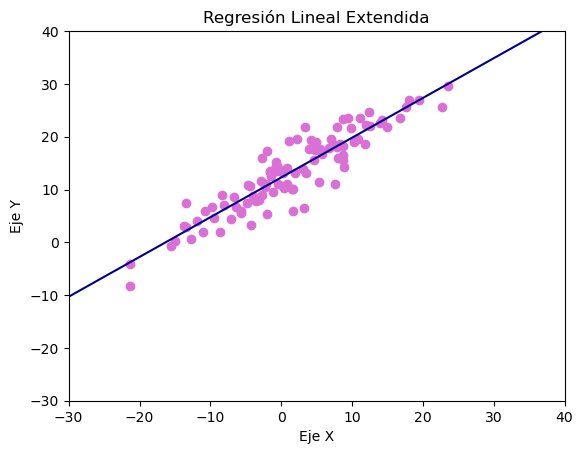

In [6]:
x_n = x.to_numpy().reshape((100,1))
y_n = y_12.to_numpy().reshape((100,1))

x_unos = np.ones((100,1),int)
x_new = np.hstack((x_unos, x_n))
x_new_t = np.transpose(x_new)

b_optimo = np.dot(np.linalg.inv(np.dot(x_new_t, x_new)), np.dot(x_new_t, y_n))

# print(b_optimo)

x_i = np.linspace(-30, 40, 1000)

fig3, ax3 = plt.subplots()
ax3.plot(x_i, x_i*b_optimo[1] + b_optimo[0], color="darkblue")
ax3.scatter(x, y_12, color="orchid")
ax3.set_xlabel("Eje X")
ax3.set_ylabel("Eje Y")
ax3.set_xlim(-30,40)
ax3.set_ylim(-30,40)
plt.title("Regresión Lineal Extendida")


plt.show()

#### **2.** 

**Usando los datos del archivo ejercicio_2.csv:**

In [7]:
data2 = pd.read_csv('ejercicio_2.csv', sep=',', header=0)

**a) Graficar y aproximar los puntos con una recta.**

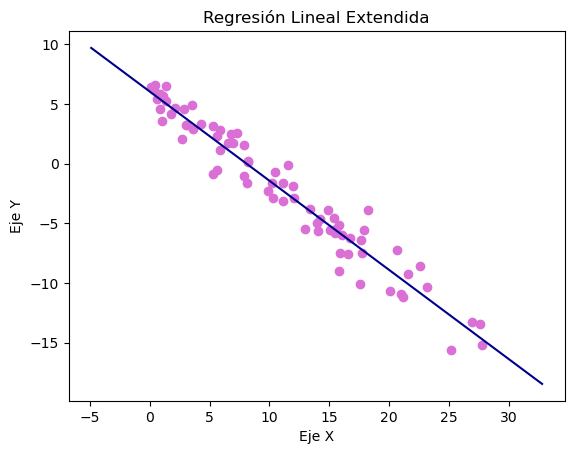

In [8]:
x_2 = data2.iloc[:,0]
y_2 = data2.iloc[:,1]

x_n2 = x_2.to_numpy().reshape((75,1))
y_n2 = y_2.to_numpy().reshape((75,1))

x_unos = np.ones((75,1),int)
x_new2 = np.hstack((x_unos, x_n2))
x_new2_t = np.transpose(x_new2)

b_optimo2 = np.dot(np.linalg.inv(np.dot(x_new2_t, x_new2)), np.dot(x_new2_t, y_n2))

# print(b_optimo)

x2_i = np.linspace(np.min(x_2) -5, np.max(x_2) + 5)

fig4, ax4 = plt.subplots()
ax4.plot(x2_i, x2_i*b_optimo2[1] + b_optimo2[0], color="darkblue")
ax4.scatter(x_2, y_2, color="orchid")
ax4.set_xlabel("Eje X")
ax4.set_ylabel("Eje Y")
# ax4.set_xlim(-5,35)
# ax4.set_ylim(-20,10)
plt.title("Regresión Lineal Extendida")


plt.show()

**b) Imaginemos que los datos forman parte de mediciones de algún tipo, como por ejemplo la temperatura de un procesador a lo largo del tiempo), y queremos predecir cuál va a ser la temperatura en el futuro. ¿Es buena la aproximación que realizamos?, ¿cuál fue el problema en este caso?**

La aproximación realizada con el modelo lineal puede ser buena o mala, dependiendo de que representen los datos.
Si los datos muestran una relación lineal clara, entonces es probable que el modelo lineal proporcione una buena aproximación.

Sin embargo, si la relación entre el eje x y el eje y no es lineal, el modelo lineal puede ser insuficiente para predecir datos futuros.  

Por ejemplo, en el caso de que los datos proporcionados representen la relación entre la temperatura y el tiempo, no podemos asegurar que la temperatura dependa unicamente del tiempo. Probablemente hayan mas variables independientes que influyan sobre esta, como por ejemplo, la carga del procesador.
Por lo tanto, podrian exister otros modelos que aproximen mejor la variable dependiente a futuro. 

### **Tercera parte.** Regresion lineal en datos reales.

**1. Teniendo en cuenta la teoría desarrollada en la primer parte del trabajo práctico y usando los datos de
entrenamiento:**

**c) ¿Cuánto vale el error cuadrático medio?**

**Definimos error cuadrático medio como:**

$$ ECM(\widehat{y})= \frac{1}{n} \sum_{i=1}^{n} (y_i - \widehat{y_i})^2 $$

**donde $y_i$ son obeservaciones de una variable y $\widehat{y_i}$ estimaciones de las mismas.**

In [9]:
data_ventas = pd.read_csv('ventas_taiwan.csv', sep=',', header=0)

data_ent = data_ventas.iloc[:315,:]
data_test = data_ventas.iloc[316:,:]



**a) Estimar los parámetros $\widehat{\beta}$ que minimizan el error cuadrático medio para este problema.**

In [25]:
x_ent = data_ent.iloc[:,1:7]
y_ent = data_ent.iloc[:,[7]]

x_m = x_ent.to_numpy().reshape((315,6))
y_m = y_ent.to_numpy().reshape((315,1))


m_unos = np.ones((315,1),int)

x_new3 = np.hstack((m_unos, x_m)) 
x_new3_t = np.transpose(x_new3)

b_est = np.dot(np.linalg.inv(np.dot(x_new3_t, x_new3)), np.dot(x_new3_t, y_ent))

x_new3.shape
# b_est

(315, 7)

**b) Encontrar $\widehat{y}$ la estimación de la variable de respuesta.**

AGREGAR FORMULA

In [23]:
y_pred = np.dot(x_new3,b_est)

y_pred.shape

(315, 1)

**2. Utilizando los datos de test, analizar cuál es el error cuadrático medio al utilizar los parámetros $\widehat{\beta}$ estimados en el punto anterior.**

**a) ¿Es la estimación mejor que sobre los datos originales?, ¿a qué se debe la discrepancia?**

**b) ¿Qué sucede con el ECM del segundo conjunto de casas si se realiza la regresión sobre todos los datos al mismo tiempo (es decir, las 414 casas)?**

**3. Graficar el error cometido por cada casa. Es decir el valor absoluto de la diferencia entre el precio por Ping real y el estimado.**

**4. Imaginemos que se agrega una nueva columna a los datos que informa el año en que la misma fue construida. ¿Disminuiría esto el ECM?**